In [1]:
from data_handling import *

In [2]:
%matplotlib inline

In [3]:
# Load the Data for given time interval [0 -> 988] 
i_start = 0
i_end = 100
data_dict, location_df, time_vec = load_data(i_start,
                                             i_end,
                                             crop= None #((-10,10),(-10,10),(-30,30))
                                            )


Number of Locations :  100040


In [4]:
data_dict[i_start].GetFieldNames()

['Pressure', 'Tracer', 'TracerBackground', 'Time', 'Velocity']

## Locations

In [5]:
location_df.head()

,X,Y,Z
0,-359.684633,-338.12365,250.0
1,359.684633,-338.12365,250.0
2,359.684633,338.12365,250.0
3,-359.684633,338.12365,250.0
4,7.701944,-338.12365,250.0


## Tracer :

In [6]:
tracer_df = data_df(data_dict,'Tracer').T
tracer_df.shape


(101, 100040)

In [7]:
mean = tracer_df.iloc[:,:100000].mean(axis=1)
std = tracer_df.iloc[:,:100000].std(axis=1)

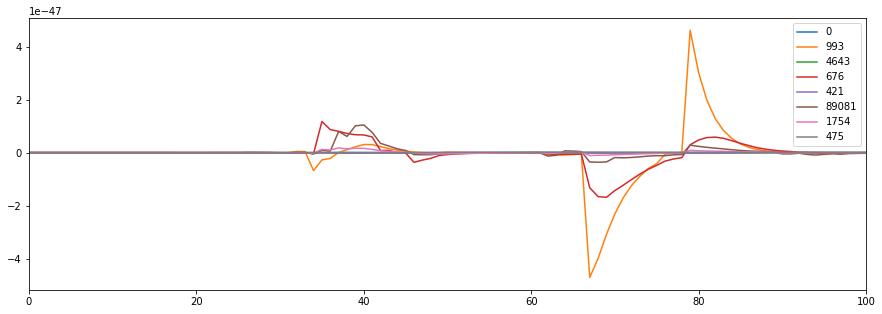

In [8]:
central_point = 0
next_points = data_dict[i_start].GetPointPoints(central_point)

tracer_df.iloc[:,next_points].plot(figsize=(15,5));

Origin Point of Tracer :  32448 [-0.41623913  0.19204782  0.2       ]


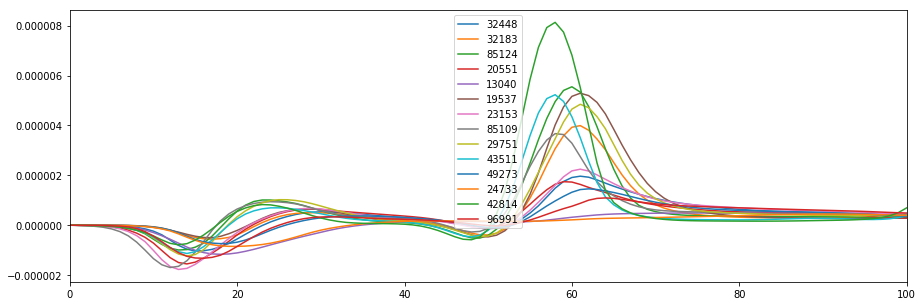

In [9]:
interest_point, coordinates_point = find_nearest_point(location_df, np.array([0,0,0]))
print('Origin Point of Tracer : ', interest_point, coordinates_point)
next_points = data_dict[i_start].GetPointPoints(interest_point)

tracer_df.iloc[:,next_points].plot(figsize=(15,5));

<IPython.core.display.Javascript object>


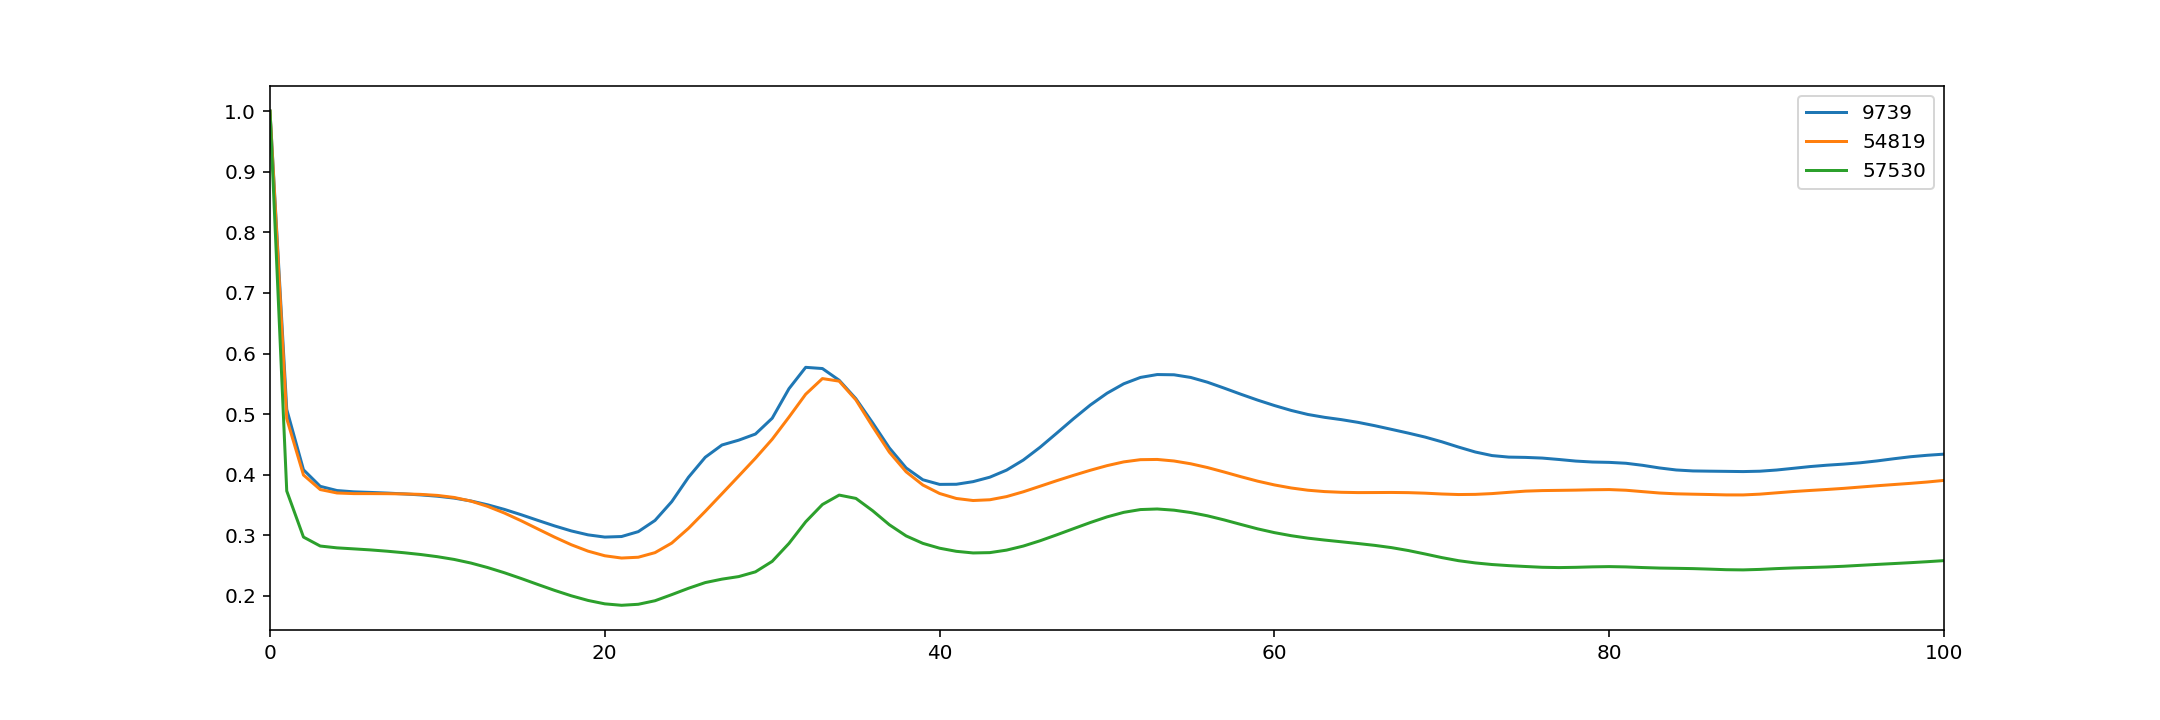

In [112]:
tracer_df.iloc[:,np.array(tracer_df.loc[0,(tracer_df.iloc[0,:] == 1)].index)].plot(figsize=(15,5));

In [111]:
np.array(tracer_df.loc[0,(tracer_df.iloc[0,:] == 1)].index)

array([ 9739, 54819, 57530])

In [26]:
ms = tracer_df.abs().mean(axis=0)
#std = tracer_df.iloc[:,:].std(axis=1)

In [29]:
rms.idxmax()

9739

In [31]:
location_df.loc[9739]

X   -23.502613
Y    25.097196
Z    11.764484
Name: 9739, dtype: float64

## Tracer Background

In [13]:
tracerB_df = data_df(data_dict,'TracerBackground').T
tracerB_df.shape

(101, 100040)

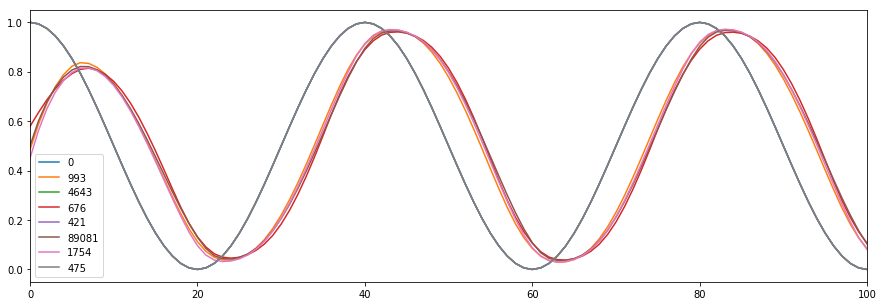

In [14]:
central_point = 0
next_points = data_dict[i_start].GetPointPoints(central_point)

tracerB_df.iloc[:200,next_points].plot(figsize=(15,5));

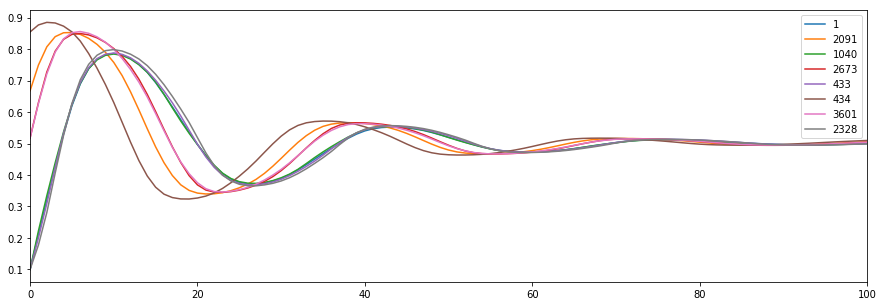

In [16]:
central_point = 1
next_points = data_dict[i_start].GetPointPoints(central_point)

tracerB_df.iloc[:200,next_points].plot(figsize=(15,5));

In [17]:
mean = tracerB_df.iloc[:,:100000].mean(axis=1)
std = tracerB_df.iloc[:,:100000].std(axis=1)

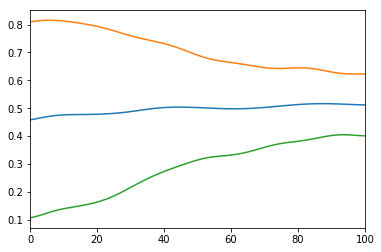

In [18]:
mean.plot();
(mean + std).plot()
(mean - std).plot()

<IPython.core.display.Javascript object>


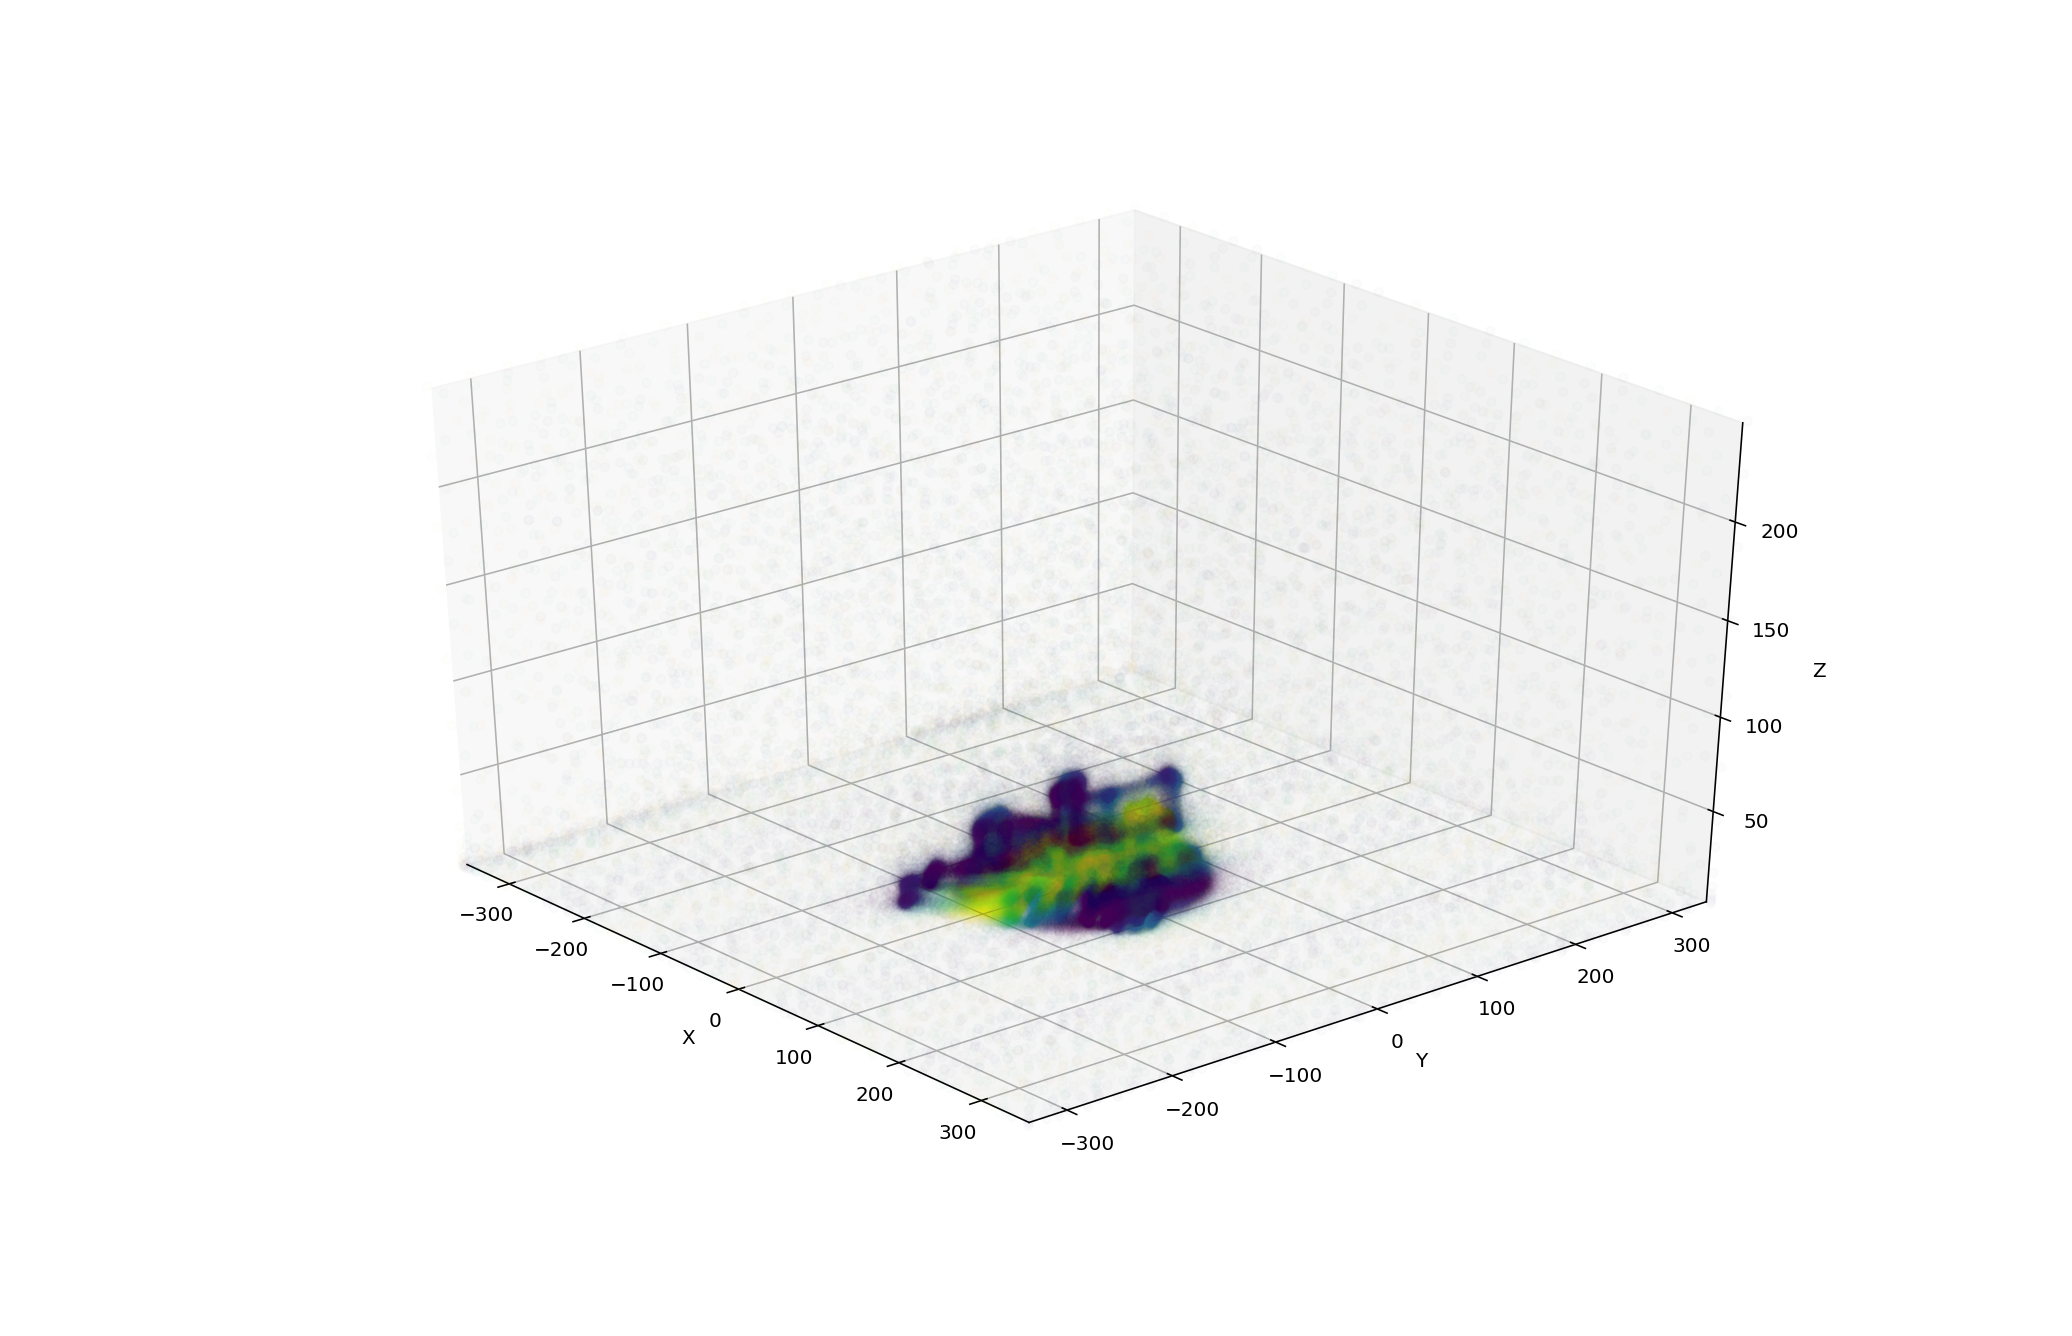

In [41]:
%matplotlib notebook

def scatter3D(marker = tracerB_df.iloc[0,:].values ):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    locations = location_df.values
    
    ax.scatter(locations[:,0], locations[:,1], locations[:,2], c=marker,alpha=0.01)

    interest_point = 9739
    ax.scatter(locations[interest_point,0], locations[interest_point,1], locations[interest_point,2], c='r')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
scatter3D(tracerB_df.iloc[0,:].values )

## Pressure

In [51]:
pressure_mat = to_matrix(mydict,'Pressure')
pressure_mat.shape


(100040, 989)

In [52]:
pressure_df = pd.DataFrame(pressure_mat.T)


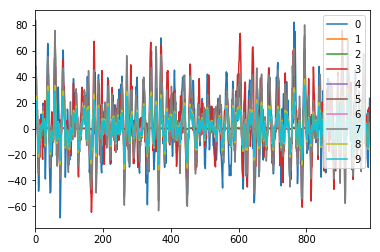

In [165]:
%matplotlib inline
pressure_df.iloc[:,:10].plot()

## Velocity

In [55]:
velocity_mat = mydict[i_start].GetField('Velocity')
velocity_mat


array([[10.39532129,  0.        ,  0.        ],
       [ 9.8796401 ,  0.        ,  0.        ],
       [ 9.8796401 ,  0.        ,  0.        ],
       ...,
       [ 8.62842496,  0.        ,  0.        ],
       [ 8.50199851,  0.        ,  0.        ],
       [ 8.32060426,  0.        ,  0.        ]])

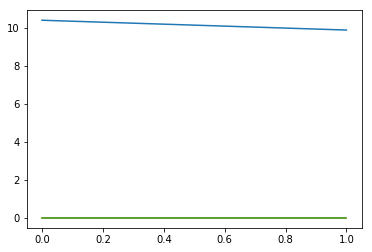

In [66]:
plt.plot(velocity_mat[:2,:]);

In [51]:
pressure_mat = to_matrix(mydict,'Pressure')
pressure_mat.shape


(100040, 989)

In [52]:
pressure_df = pd.DataFrame(pressure_mat.T)


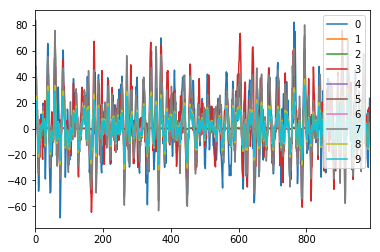

In [70]:
pressure_df.iloc[:,:10].plot();